In [1]:
# importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import Dis_Stats as ds
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
# loading the dataset

df = pd.read_csv('gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
# to check the overview of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
# to get the basic stats of the dataset

df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
# to change the type of gender data into int using label encoding

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [6]:
df['gender']

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [8]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [9]:
# to check there is any null value

df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [10]:
# to get the advanced stats of the dataset

for i in df.columns:
    print('||',i,'||')
    ds.calc_fo(df[i])
    print('='*50)

|| long_hair ||
Total 4349
Total Count 5001
Mean 0.869626074785043
Median 1.0
Mode 1
Minimum 0
Maximum 1
Range 1
Variance 0.11337656483900181
Standard Deviation 0.3367143668437713
Quartile 1 1.0
Quartile 3 1.0
Inter Quartile Range 0.0
Lower Whisker 1.0
Upper Whisker 1.0
-2.1954873993038855
2.8201649205021377
|| forehead_width_cm ||
Total 65920.6
Total Count 5001
Mean 13.18148370325935
Median 13.1
Mode 12.0
Minimum 11.4
Maximum 15.5
Range 4.1
Variance 1.2254879805882455
Standard Deviation 1.1070176062684123
Quartile 1 12.2
Quartile 3 14.0
Inter Quartile Range 1.8000000000000007
Lower Whisker 9.499999999999998
Upper Whisker 16.700000000000003
0.24216884127602942
-0.930865697789264
|| forehead_height_cm ||
Total 29737.5
Total Count 5001
Mean 5.946310737852429
Median 5.9
Mode 5.7
Minimum 5.1
Maximum 7.1
Range 2.0
Variance 0.29291230416184305
Standard Deviation 0.5412137324217143
Quartile 1 5.5
Quartile 3 6.4
Inter Quartile Range 0.9000000000000004
Lower Whisker 4.1499999999999995
Upper Whi

long_hair


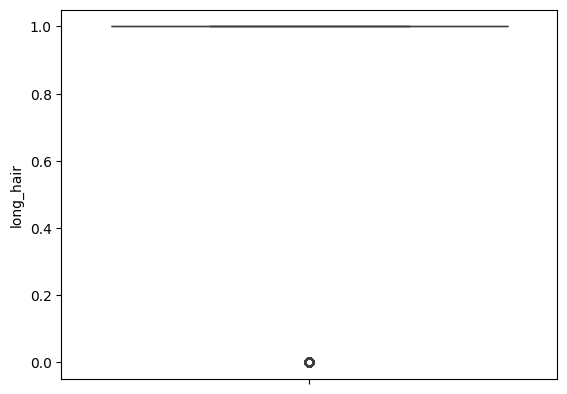

forehead_width_cm


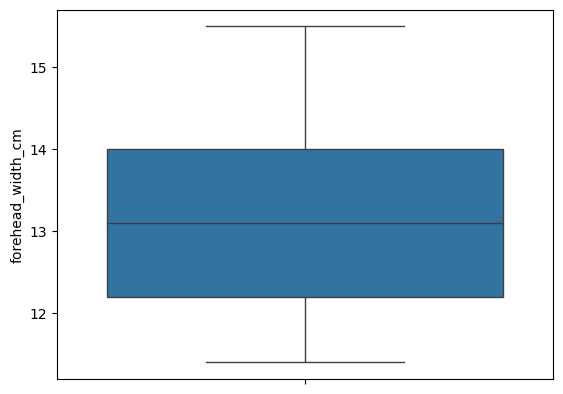

forehead_height_cm


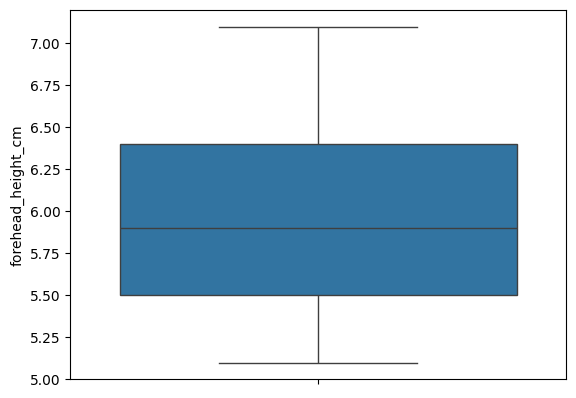

nose_wide


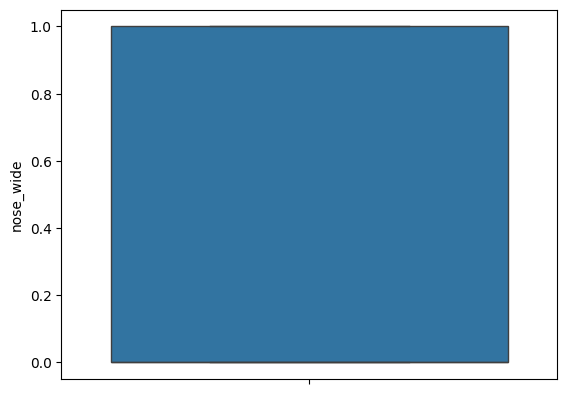

nose_long


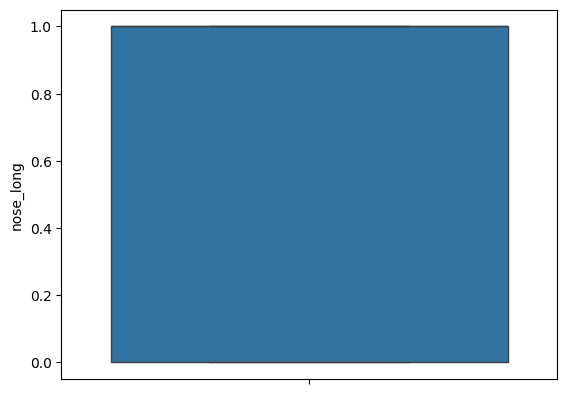

lips_thin


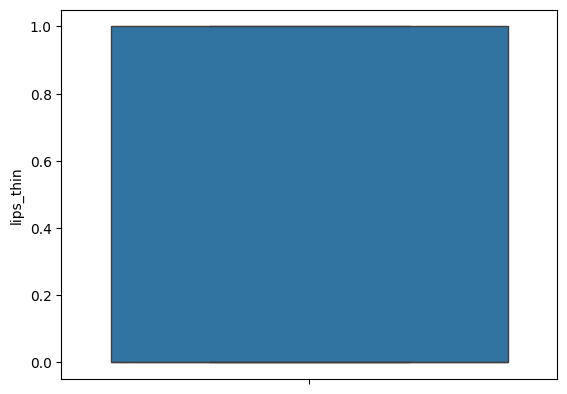

distance_nose_to_lip_long


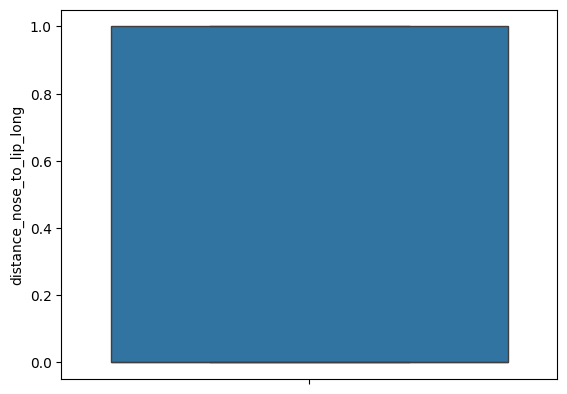

gender


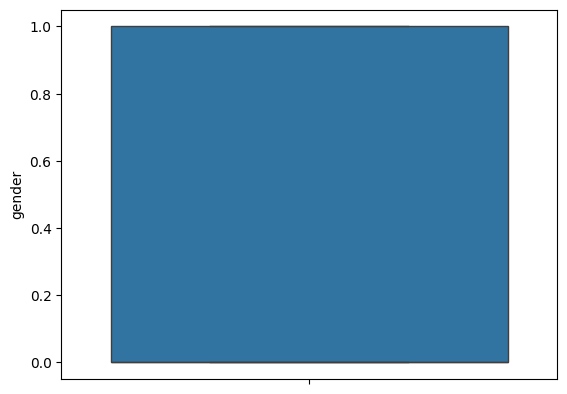

In [11]:
# to create box plot to check for outliers

for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

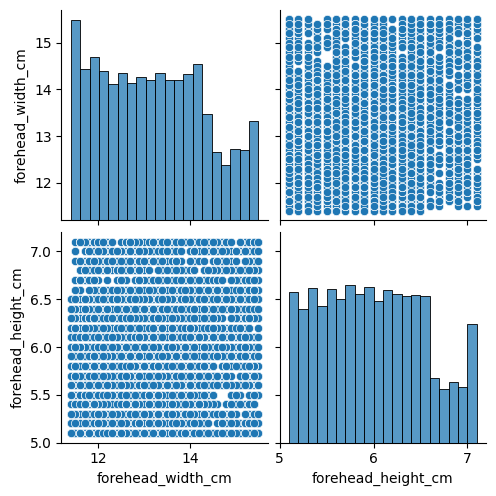

In [12]:
# to create pairplot of some data

sns.pairplot(df[['forehead_width_cm','forehead_height_cm']])
plt.show()

long_hair


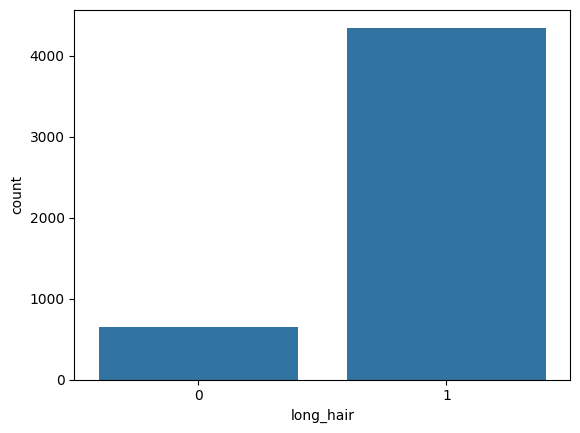

nose_wide


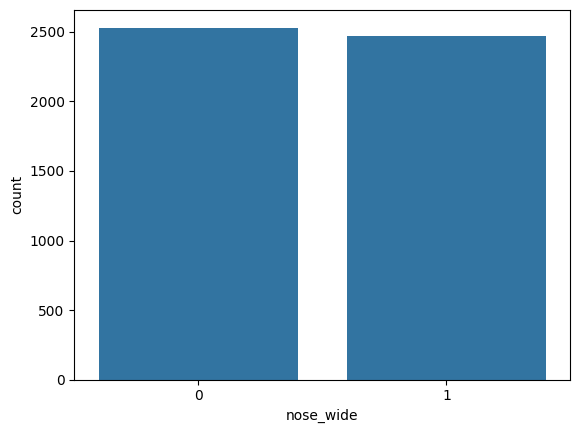

nose_long


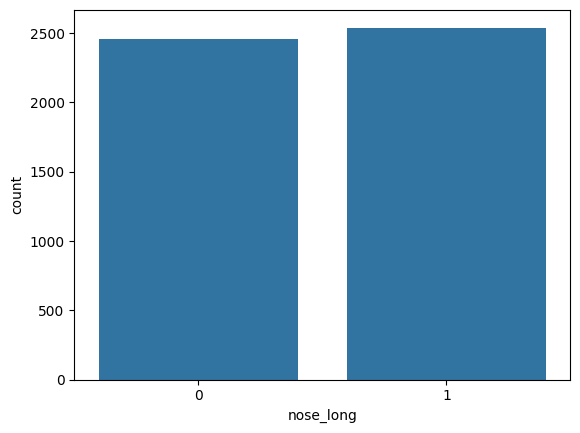

lips_thin


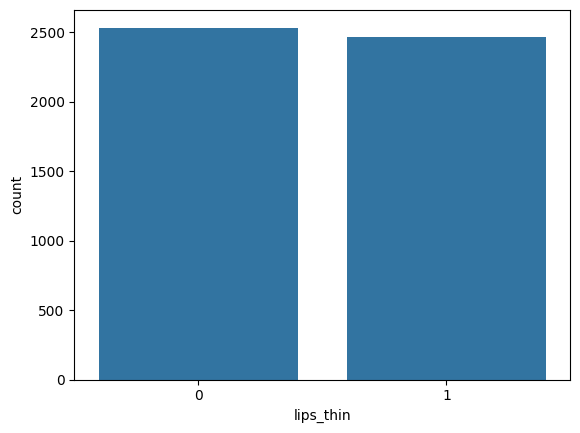

distance_nose_to_lip_long


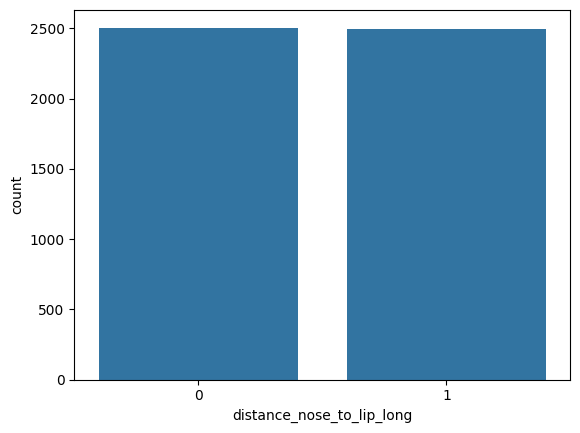

gender


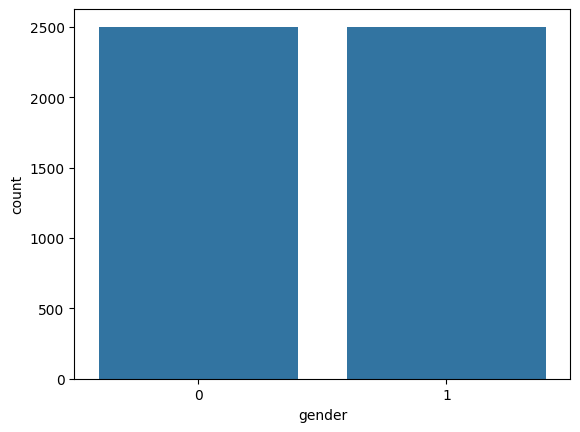

In [13]:
# to create count plot for remaining data

for i in df.drop(['forehead_width_cm','forehead_height_cm'],axis=1).columns:
    print(i)
    sns.countplot(data=df,x=i)
    plt.show()

<Axes: >

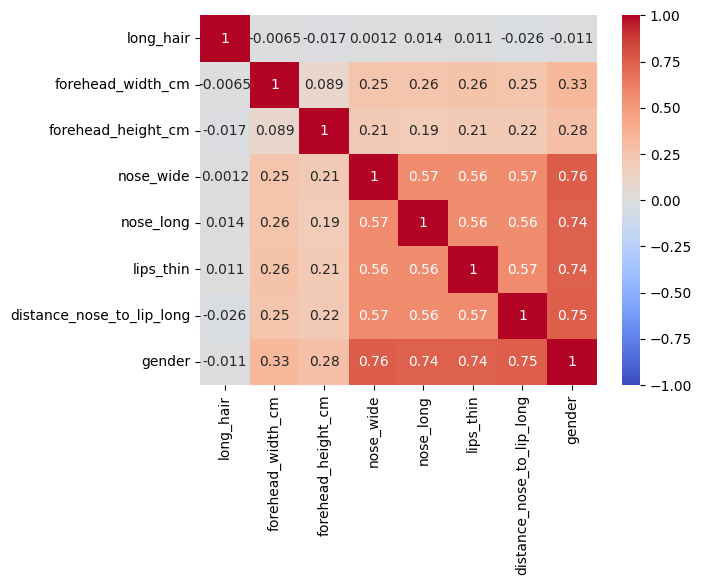

In [14]:
# to heatmap for the dataset

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [15]:
# to split the dataset 

x = df.drop('gender',axis=1)
y = df['gender']

In [16]:
x

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [17]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [18]:
# to split these data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [19]:
x_train

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
235,1,15.1,5.4,1,1,1,1
2697,1,11.8,6.5,0,0,0,0
1219,1,13.2,5.7,0,1,1,1
135,1,11.9,5.3,0,0,0,0
3613,1,12.7,5.9,1,1,1,1
...,...,...,...,...,...,...,...
4149,1,14.3,5.4,1,1,1,1
1890,1,13.5,5.2,1,1,1,0
350,1,12.2,5.4,0,0,0,1
79,1,11.6,7.1,0,1,1,1


In [20]:
y_train

235     1
2697    0
1219    1
135     0
3613    1
       ..
4149    1
1890    1
350     0
79      1
3927    1
Name: gender, Length: 4000, dtype: int64

In [21]:
x_test

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
294,0,13.9,6.1,1,1,1,1
1379,1,11.9,6.3,0,1,0,0
3667,1,13.6,6.4,1,0,0,0
504,0,15.3,5.7,1,1,1,1
1359,0,11.9,6.2,0,0,0,0
...,...,...,...,...,...,...,...
4526,1,15.4,5.2,1,1,1,1
2029,1,14.5,5.5,1,1,1,1
4922,1,11.5,6.2,0,0,0,0
4523,1,13.0,6.1,1,1,1,1


In [22]:
y_test

294     1
1379    0
3667    0
504     1
1359    0
       ..
4526    1
2029    1
4922    0
4523    1
4522    1
Name: gender, Length: 1001, dtype: int64

In [23]:
x_train.shape

(4000, 7)

In [24]:
x_test.shape

(1001, 7)

In [25]:
len(y_train)

4000

In [26]:
len(y_test)

1001

In [27]:
# to assign the algorithm to a variable 

nv = GaussianNB()
nv


,priors,None
,var_smoothing,1e-09


In [28]:
# to fit the training data

nv.fit(x_train,y_train)


,priors,None
,var_smoothing,1e-09


In [29]:
# to get the prediction on train & test data

y_train_pred = nv.predict(x_train)
y_test_pred = nv.predict(x_test)

In [30]:
y_train_pred

array([1, 0, 1, ..., 0, 1, 1], shape=(4000,))

In [31]:
y_test_pred

array([1, 0, 0, ..., 0, 1, 1], shape=(1001,))

In [32]:
# to get the classification report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1997
           1       0.98      0.97      0.97      2003

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       504
           1       0.97      0.97      0.97       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [34]:
# to get the user input

long_hair = int(input('Is your hair long [yes==1 , no==0] : '))
forehead_width_cm = float(input('Enter your forhead width [cm]: '))
forehead_height_cm = float(input('Enter your forhead height [cm]: '))
nose_wide = int(input('Is your nose is wide [yes==1 , no==0] : '))
nose_long =  int(input('Is your nose long [yes==1 , no==0] : '))
lips_thin =  int(input('Is your lips thin [yes==1 , no==0] : '))
distance_nose_to_lip_long =  int(input('Is distance b/w nose and lip are too long [yes==1 , no==0] : '))

user_input  = np.array([long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long]).reshape(1,-1)

if nv.predict(user_input) == 0:
    print('Your Gender is Female')
else:
    print('Your Gender is Male')

Is your hair long [yes==1 , no==0] :  1
Enter your forhead width [cm]:  13.9
Enter your forhead height [cm]:  6
Is your nose is wide [yes==1 , no==0] :  0
Is your nose long [yes==1 , no==0] :  0
Is your lips thin [yes==1 , no==0] :  0
Is distance b/w nose and lip are too long [yes==1 , no==0] :  0


Your Gender is Female


C:\Users\Muhammed Thouyib TK\.conda\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [35]:
# model deployment

import pickle

filename = 'Model_Deploy.sav'
pickle.dump(nv,open(filename,'wb'))

loaded_data = pickle.load(open('Model_Deploy.sav','rb'))